## 导入文件
- sheet_name=2（实际sheet3）

In [1]:
import pandas as pd

# 指定要读取的列
columns = ['Length/AA', 'AF-TM','1.0-0.9-TM','0.9-0.8-TM','0.8-0.7-TM','0.7-0.6-TM','0.6-0.5-TM','0.5-0.4-TM','0.4-0.3-TM']
# 读取.xlsx文件并只读取指定列的数据
df = pd.read_excel("H:\Graduation_project\DataBase\database.xlsx", usecols=columns,sheet_name=2)

# 取第2-25行数据（即Globular proteins数据），同理取其他的
df_globular  = df.iloc[0:24, :]
df_membrane = df.iloc[24:48, :]
df_fibrous = df.iloc[48:72, :]
df_unstructured = df.iloc[72:96, :]

# 将四个DataFrame合并成一个DataFrame  
df = pd.concat([df_globular.assign(label='Globular'), 
                df_membrane.assign(label='Membrane'), 
                df_fibrous.assign(label='Fibrous'),
                df_unstructured.assign(label='Unstructured')])

print(df.head(5))
# 计算'Length/AA'列的样本总量并输出结果
count = df['Length/AA'].count()
print("样本总量为: ", count)

   Length/AA    AF-TM  1.0-0.9-TM  0.9-0.8-TM  0.8-0.7-TM  0.7-0.6-TM  \
0        340  0.99373     0.98579         NaN         NaN         NaN   
1        482  0.79617     0.98924         NaN         NaN         NaN   
2        442  0.93410     0.99215         NaN         NaN         NaN   
3        309  0.97439     0.99962         NaN         NaN         NaN   
4        311  0.97639     0.96386         NaN         NaN         NaN   

   0.6-0.5-TM  0.5-0.4-TM  0.4-0.3-TM     label  
0         NaN         NaN         NaN  Globular  
1         NaN         NaN         NaN  Globular  
2         NaN         NaN     0.75291  Globular  
3         NaN         NaN     0.83466  Globular  
4         NaN     0.78728     0.91986  Globular  
样本总量为:  96


## 【正向思考】
#### 对不同区间单独进行af和sm比较

In [2]:
# 创建一个布尔掩码，用于选择'1.0-0.9-TMD'列中非空值的行
mask9 = df['1.0-0.9-TM'].notnull()
# 使用掩码选择相应的行
result9 = df[mask9]

mask8 = df['0.9-0.8-TM'].notnull()
result8 = df[mask8]

mask7 = df['0.8-0.7-TM'].notnull()
result7 = df[mask7]

mask6 = df['0.7-0.6-TM'].notnull()
result6 = df[mask6]

mask5 = df['0.6-0.5-TM'].notnull()
result5 = df[mask5]

mask4 = df['0.5-0.4-TM'].notnull()
result4 = df[mask4]

mask3 = df['0.4-0.3-TM'].notnull()
result3 = df[mask3]

# 输出前5行数据
print(result5.head(5))


    Length/AA    AF-TM  1.0-0.9-TM  0.9-0.8-TM  0.8-0.7-TM  0.7-0.6-TM  \
5         208  0.82656         NaN     0.86901         NaN     0.79059   
17        344  0.94948     0.48312         NaN         NaN         NaN   
22        148  0.93078     0.97097         NaN         NaN         NaN   
23         79  0.78570     0.98550         NaN     0.73938     0.74913   
24        979  0.20220         NaN     0.24807     0.25489     0.24844   

    0.6-0.5-TM  0.5-0.4-TM  0.4-0.3-TM     label  
5      0.83379     0.80676         NaN  Globular  
17     0.46543     0.43543     0.45352  Globular  
22     0.83509     0.72939     0.84626  Globular  
23     0.66202     0.67747         NaN  Globular  
24     0.24016         NaN     0.83365  Membrane  


#### 输出af结果
> 改result
- result9  |  1.0-0.9-TM
- result8  |  0.9-0.8-TM
- result7  |  0.8-0.7-TM
- result6  |  0.7-0.6-TM
- result5  |  0.6-0.5-TM
- result4  |  0.5-0.4-TM
- result3  |  0.4-0.3-TM

In [40]:
# result, SM = result9, '1.0-0.9-TM'
# result, SM = result8, '0.9-0.8-TM'
# result, SM = result7, '0.8-0.7-TM'
# result, SM = result6, '0.7-0.6-TM'
# result, SM = result5, '0.6-0.5-TM'
# result, SM = result4, '0.5-0.4-TM'
result, SM = result3, '0.4-0.3-TM'

样本总量为:  33


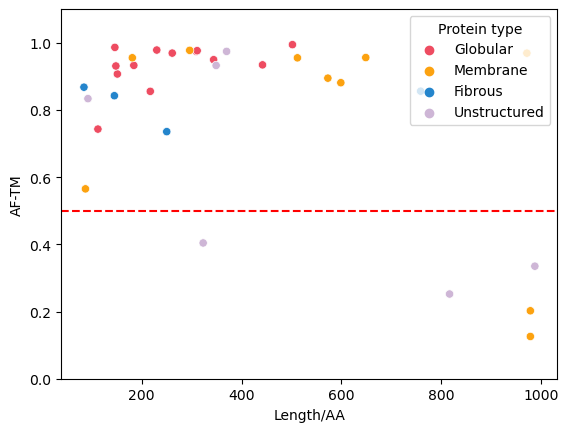

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x='Length/AA', y='AF-TM', hue='label', data=result, palette={'Globular': '#ee4c61', 'Membrane': '#fca210', 'Fibrous': '#2485cc', 'Unstructured': '#ceb6d6'})
plt.ylim([0, 1.1])
plt.axhline(y=0.5, color='r', linestyle='--')

# 显示图例 
plt.legend(loc='upper right', title='Protein type')

# 计算'Length/AA'列的样本总量并输出结果
count = result['Length/AA'].count()
print("样本总量为: ", count)

plt.show()

100.0
80.0
100.0
50.0


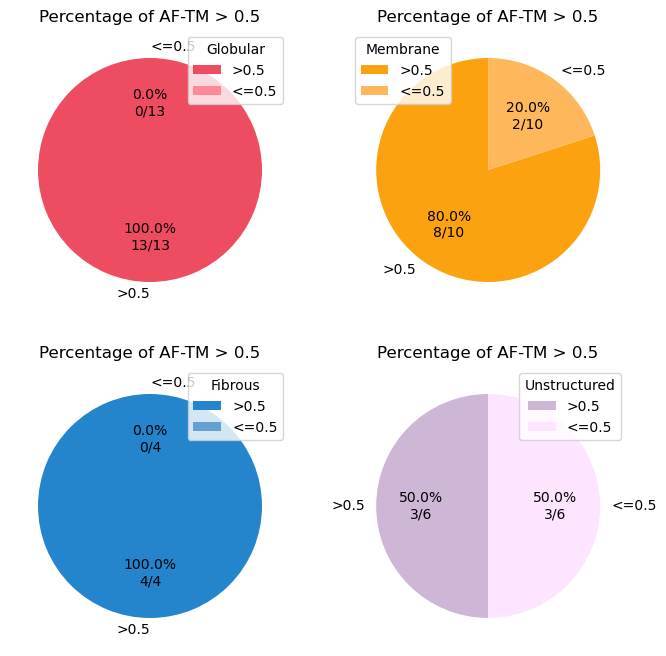

In [42]:
import pandas as pd
import matplotlib.pyplot as plt

# 选择带有"Globular"标签的行
result_globular_rows = result[result['label'] == 'Globular']
# 计算每个数据集中大于0.5的tm数据个数和总tm数据个数的百分比
globular_total_tm = result_globular_rows['AF-TM'].count()
globular_below6_tm = (result_globular_rows['AF-TM'] > 0.5).sum()
globular_below6_percent = globular_below6_tm / globular_total_tm * 100
print(globular_below6_percent)

result_membrane_rows = result[result['label'] == 'Membrane']
membrane_total_tm = result_membrane_rows['AF-TM'].count()
membrane_below6_tm = (result_membrane_rows['AF-TM'] > 0.5).sum()
membrane_below6_percent = membrane_below6_tm / membrane_total_tm * 100
print(membrane_below6_percent)

result_fibrous_rows = result[result['label'] == 'Fibrous']
fibrous_total_tm = result_fibrous_rows['AF-TM'].count()
fibrous_below6_tm = (result_fibrous_rows['AF-TM'] > 0.5).sum()
fibrous_below6_percent = fibrous_below6_tm / fibrous_total_tm * 100
print(fibrous_below6_percent)

result_unstructured_rows = result[result['label'] == 'Unstructured']
unstructured_total_tm = result_unstructured_rows['AF-TM'].count()
unstructured_below6_tm = (result_unstructured_rows['AF-TM'] > 0.5).sum()
unstructured_below6_percent = unstructured_below6_tm / unstructured_total_tm * 100
print(unstructured_below6_percent)

###############————————————————————————————————————————————————————————————————————————————————————————————————————————————————————
# Format the label to include count and percentage
def label_format(pct, count):
    absolute = int(count * pct / 100.0 + 0.5)
    return "{:.1f}%\n{}/{:.0f}".format(pct, absolute, count)

# 创建饼图数据
data1 = [globular_below6_tm, globular_total_tm - globular_below6_tm]
data2 = [membrane_below6_tm, membrane_total_tm - membrane_below6_tm]
data3 = [fibrous_below6_tm, fibrous_total_tm - fibrous_below6_tm]
data4 = [unstructured_below6_tm, unstructured_total_tm - unstructured_below6_tm]
labels = ['>0.5', '<=0.5']

# 绘制饼图
# labels = ['All alpha', 'All beta', 'Alpha + beta']
# sizes = [allalpha_below6_percent, allbeta_below6_percent, alphabeta_below6_percent]
colors1 = ['#ee4c61', '#ff8a95']
colors2 = ['#fca210', '#ffb75b']
colors3 = ['#2485cc', '#65a0d3']
colors4 = ['#ceb6d6', '#fee5ff']

# 创建包含 4 个子图的图形窗口
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(8, 8))

if globular_below6_percent > 0:
    axs[0][0].pie(data1, labels=labels, colors=colors1, autopct=lambda pct: label_format(pct, globular_total_tm), startangle=90)
    axs[0][0].set_title('Percentage of AF-TM > 0.5', loc='center')
    axs[0][0].legend(labels, title='Globular', loc='best')
else: 
    axs[0][0].axis('off')

if membrane_below6_percent > 0:
    axs[0][1].pie(data2, labels=labels, colors=colors2, autopct=lambda pct: label_format(pct, membrane_total_tm), startangle=90)
    axs[0][1].set_title('Percentage of AF-TM > 0.5', loc='center')
    axs[0][1].legend(labels, title='Membrane', loc='best')
else: 
    axs[0][1].axis('off')

if fibrous_below6_percent > 0:
    axs[1][0].pie(data3, labels=labels, colors=colors3, autopct=lambda pct: label_format(pct, fibrous_total_tm), startangle=90)
    axs[1][0].set_title('Percentage of AF-TM > 0.5', loc='center')
    axs[1][0].legend(labels, title='Fibrous', loc='best')
else: 
    axs[1][0].axis('off')

if unstructured_below6_percent > 0:
    axs[1][1].pie(data4, labels=labels, colors=colors4, autopct=lambda pct: label_format(pct, unstructured_total_tm), startangle=90)
    axs[1][1].set_title('Percentage of AF-TM > 0.5', loc='center')
    axs[1][1].legend(labels, title='Unstructured', loc='best')
else: 
    axs[1][1].axis('off')

# 显示饼图
plt.show()


#### 输出sm结果
> 改result & 改sm
- result9  |  1.0-0.9-TM
- result8  |  0.9-0.8-TM
- result7  |  0.8-0.7-TM
- result6  |  0.7-0.6-TM
- result5  |  0.6-0.5-TM
- result4  |  0.5-0.4-TM
- result3  |  0.4-0.3-TM

In [43]:
# result, SM = result9, '1.0-0.9-TM'
# result, SM = result8, '0.9-0.8-TM'
# result, SM = result7, '0.8-0.7-TM'
# result, SM = result6, '0.7-0.6-TM'
# result, SM = result5, '0.6-0.5-TM'
# result, SM = result4, '0.5-0.4-TM'
# result, SM = result3, '0.4-0.3-TM'

样本总量为:  33


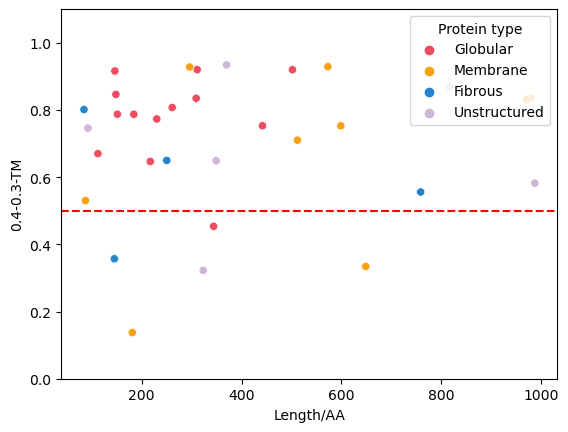

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt
# result=result3
# SM='SM-0.7-0.6-RMSD'

sns.scatterplot(x='Length/AA', y=SM, hue='label', data=result, palette={'Globular': '#ee4c61', 'Membrane': '#fca210', 'Fibrous': '#2485cc', 'Unstructured': '#ceb6d6'})
plt.ylim([0, 1.1])
plt.axhline(y=0.5, color='r', linestyle='--')

# 显示图例 
plt.legend(loc='upper right', title='Protein type')

# 计算'Length/AA'列的样本总量并输出结果
count = result['Length/AA'].count()
print("样本总量为: ", count)

plt.show()

92.3076923076923
80.0
75.0
83.33333333333334


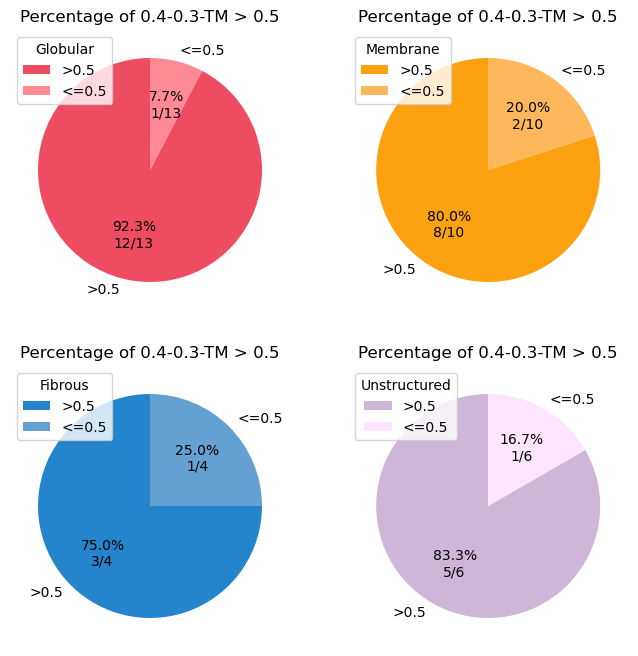

In [45]:
import pandas as pd
import matplotlib.pyplot as plt

# 选择带有"Globular"标签的行
result_globular_rows = result[result['label'] == 'Globular']
# 计算每个数据集中大于0.5的tm数据个数和总tm数据个数的百分比
globular_total_tm = result_globular_rows[SM].count()
globular_below6_tm = (result_globular_rows[SM] > 0.5).sum()
globular_below6_percent = globular_below6_tm / globular_total_tm * 100
print(globular_below6_percent)

result_membrane_rows = result[result['label'] == 'Membrane']
membrane_total_tm = result_membrane_rows[SM].count()
membrane_below6_tm = (result_membrane_rows[SM] > 0.5).sum()
membrane_below6_percent = membrane_below6_tm / membrane_total_tm * 100
print(membrane_below6_percent)

result_fibrous_rows = result[result['label'] == 'Fibrous']
fibrous_total_tm = result_fibrous_rows[SM].count()
fibrous_below6_tm = (result_fibrous_rows[SM] > 0.5).sum()
fibrous_below6_percent = fibrous_below6_tm / fibrous_total_tm * 100
print(fibrous_below6_percent)

result_unstructured_rows = result[result['label'] == 'Unstructured']
unstructured_total_tm = result_unstructured_rows[SM].count()
unstructured_below6_tm = (result_unstructured_rows[SM] > 0.5).sum()
unstructured_below6_percent = unstructured_below6_tm / unstructured_total_tm * 100
print(unstructured_below6_percent)

###############————————————————————————————————————————————————————————————————————————————————————————————————————————————————————
# Format the label to include count and percentage
def label_format(pct, count):
    absolute = int(count * pct / 100.0 + 0.5)
    return "{:.1f}%\n{}/{:.0f}".format(pct, absolute, count)

# 创建饼图数据
data1 = [globular_below6_tm, globular_total_tm - globular_below6_tm]
data2 = [membrane_below6_tm, membrane_total_tm - membrane_below6_tm]
data3 = [fibrous_below6_tm, fibrous_total_tm - fibrous_below6_tm]
data4 = [unstructured_below6_tm, unstructured_total_tm - unstructured_below6_tm]
labels = ['>0.5', '<=0.5']

# 绘制饼图
# labels = ['All alpha', 'All beta', 'Alpha + beta']
# sizes = [allalpha_below6_percent, allbeta_below6_percent, alphabeta_below6_percent]
colors1 = ['#ee4c61', '#ff8a95']
colors2 = ['#fca210', '#ffb75b']
colors3 = ['#2485cc', '#65a0d3']
colors4 = ['#ceb6d6', '#fee5ff']

# 创建包含 4 个子图的图形窗口
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(8, 8))

if globular_below6_percent >= 0:
    axs[0][0].pie(data1, labels=labels, colors=colors1, autopct=lambda pct: label_format(pct, globular_total_tm), startangle=90)
    axs[0][0].set_title('Percentage of ' + SM +' > 0.5', loc='center')
    axs[0][0].legend(labels, title='Globular', loc='best')
else: 
    axs[0][0].axis('off')

if membrane_below6_percent >= 0:
    axs[0][1].pie(data2, labels=labels, colors=colors2, autopct=lambda pct: label_format(pct, membrane_total_tm), startangle=90)
    axs[0][1].set_title('Percentage of ' + SM +' > 0.5', loc='center')
    axs[0][1].legend(labels, title='Membrane', loc='best')
else: 
    axs[0][1].axis('off')

if fibrous_below6_percent >= 0:
    axs[1][0].pie(data3, labels=labels, colors=colors3, autopct=lambda pct: label_format(pct, fibrous_total_tm), startangle=90)
    axs[1][0].set_title('Percentage of ' + SM +' > 0.5', loc='center')
    axs[1][0].legend(labels, title='Fibrous', loc='best')
else: 
    axs[1][0].axis('off')

if unstructured_below6_percent >= 0:
    axs[1][1].pie(data4, labels=labels, colors=colors4, autopct=lambda pct: label_format(pct, unstructured_total_tm), startangle=90)
    axs[1][1].set_title('Percentage of ' + SM +' > 0.5', loc='center')
    axs[1][1].legend(labels, title='Unstructured', loc='best')
else: 
    axs[1][1].axis('off')

# 显示饼图
plt.show()


## 换一种图表

In [34]:
result, SM = result9, '1.0-0.9-TM'
# result, SM = result8, '0.9-0.8-TM'
# result, SM = result7, '0.8-0.7-TM'
# result, SM = result6, '0.7-0.6-TM'
# result, SM = result5, '0.6-0.5-TM'
# result, SM = result4, '0.5-0.4-TM'
# result, SM = result3, '0.4-0.3-TM'

样本总量为:  70


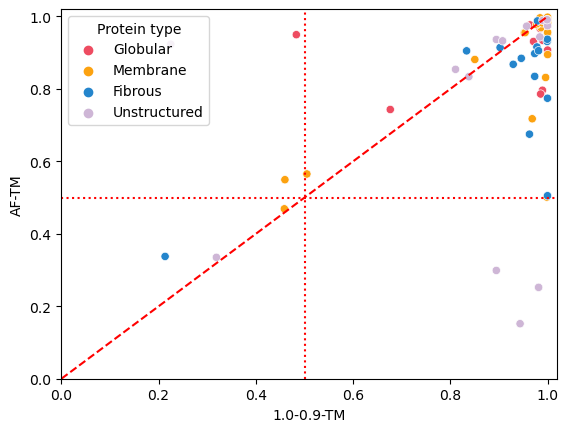

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x=SM, y='AF-TM', hue='label', data=result, palette={'Globular': '#ee4c61', 'Membrane': '#fca210', 'Fibrous': '#2485cc', 'Unstructured': '#ceb6d6'})
plt.ylim([0, 1.02])
plt.xlim([0, 1.02])
plt.plot([0, 1], [0, 1], linestyle='--', linewidth=1.5, color='red')
plt.axvline(x=0.5,color='r', linestyle=':')
plt.axhline(y=0.5,color='r', linestyle=':')

# 显示图例 
plt.legend(loc='best', title='Protein type')

# 计算'Length/AA'列的样本总量并输出结果
count = result['Length/AA'].count()
print("样本总量为: ", count)

plt.show()

100.0
95.45454545454545
93.33333333333333
66.66666666666666


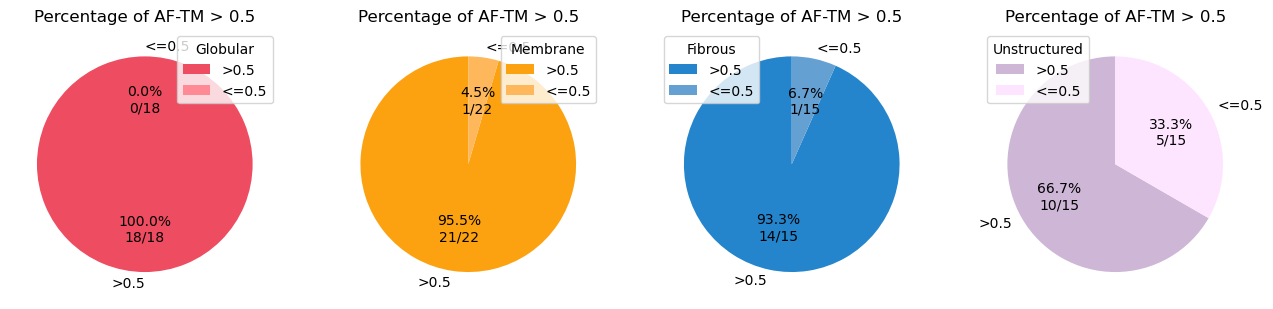

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

# 选择带有"Globular"标签的行
result_globular_rows = result[result['label'] == 'Globular']
# 计算每个数据集中大于0.5的tm数据个数和总tm数据个数的百分比
globular_total_tm = result_globular_rows['AF-TM'].count()
globular_below6_tm = (result_globular_rows['AF-TM'] > 0.5).sum()
globular_below6_percent = globular_below6_tm / globular_total_tm * 100
print(globular_below6_percent)

result_membrane_rows = result[result['label'] == 'Membrane']
membrane_total_tm = result_membrane_rows['AF-TM'].count()
membrane_below6_tm = (result_membrane_rows['AF-TM'] > 0.5).sum()
membrane_below6_percent = membrane_below6_tm / membrane_total_tm * 100
print(membrane_below6_percent)

result_fibrous_rows = result[result['label'] == 'Fibrous']
fibrous_total_tm = result_fibrous_rows['AF-TM'].count()
fibrous_below6_tm = (result_fibrous_rows['AF-TM'] > 0.5).sum()
fibrous_below6_percent = fibrous_below6_tm / fibrous_total_tm * 100
print(fibrous_below6_percent)

result_unstructured_rows = result[result['label'] == 'Unstructured']
unstructured_total_tm = result_unstructured_rows['AF-TM'].count()
unstructured_below6_tm = (result_unstructured_rows['AF-TM'] > 0.5).sum()
unstructured_below6_percent = unstructured_below6_tm / unstructured_total_tm * 100
print(unstructured_below6_percent)

###############————————————————————————————————————————————————————————————————————————————————————————————————————————————————————
# Format the label to include count and percentage
def label_format(pct, count):
    absolute = int(count * pct / 100.0 + 0.5)
    return "{:.1f}%\n{}/{:.0f}".format(pct, absolute, count)

# 创建饼图数据
data1 = [globular_below6_tm, globular_total_tm - globular_below6_tm]
data2 = [membrane_below6_tm, membrane_total_tm - membrane_below6_tm]
data3 = [fibrous_below6_tm, fibrous_total_tm - fibrous_below6_tm]
data4 = [unstructured_below6_tm, unstructured_total_tm - unstructured_below6_tm]
labels = ['>0.5', '<=0.5']

# 绘制饼图
# labels = ['All alpha', 'All beta', 'Alpha + beta']
# sizes = [allalpha_below6_percent, allbeta_below6_percent, alphabeta_below6_percent]
colors1 = ['#ee4c61', '#ff8a95']
colors2 = ['#fca210', '#ffb75b']
colors3 = ['#2485cc', '#65a0d3']
colors4 = ['#ceb6d6', '#fee5ff']

# 创建包含 4 个子图的图形窗口
fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(16, 4))

if globular_below6_percent > 0:
    axs[0].pie(data1, labels=labels, colors=colors1, autopct=lambda pct: label_format(pct, globular_total_tm), startangle=90)
    axs[0].set_title('Percentage of AF-TM > 0.5', loc='center')
    axs[0].legend(labels, title='Globular', loc='best')
else: 
    axs[0].axis('off')

if membrane_below6_percent > 0:
    axs[1].pie(data2, labels=labels, colors=colors2, autopct=lambda pct: label_format(pct, membrane_total_tm), startangle=90)
    axs[1].set_title('Percentage of AF-TM > 0.5', loc='center')
    axs[1].legend(labels, title='Membrane', loc='best')
else: 
    axs[1].axis('off')

if fibrous_below6_percent > 0:
    axs[2].pie(data3, labels=labels, colors=colors3, autopct=lambda pct: label_format(pct, fibrous_total_tm), startangle=90)
    axs[2].set_title('Percentage of AF-TM > 0.5', loc='center')
    axs[2].legend(labels, title='Fibrous', loc='best')
else: 
    axs[2].axis('off')

if unstructured_below6_percent > 0:
    axs[3].pie(data4, labels=labels, colors=colors4, autopct=lambda pct: label_format(pct, unstructured_total_tm), startangle=90)
    axs[3].set_title('Percentage of AF-TM > 0.5', loc='center')
    axs[3].legend(labels, title='Unstructured', loc='best')
else: 
    axs[3].axis('off')

# 显示饼图
plt.show()


94.44444444444444
90.9090909090909
93.33333333333333
86.66666666666667


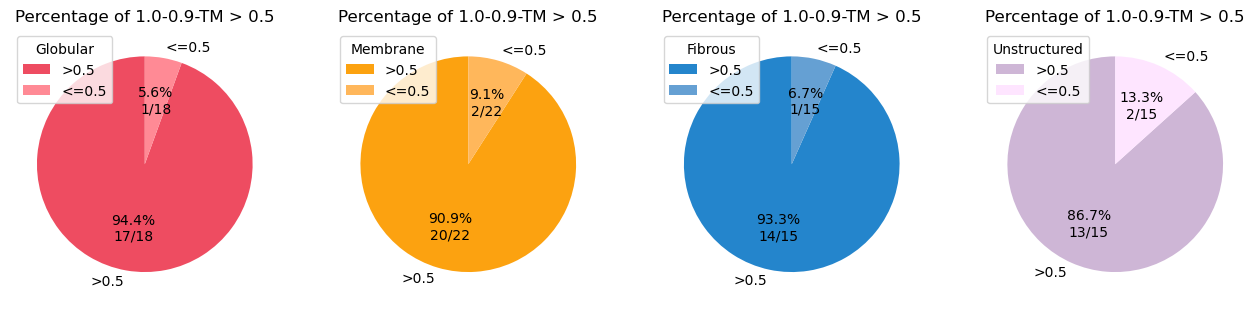

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

# 选择带有"Globular"标签的行
result_globular_rows = result[result['label'] == 'Globular']
# 计算每个数据集中大于0.5的tm数据个数和总tm数据个数的百分比
globular_total_tm = result_globular_rows[SM].count()
globular_below6_tm = (result_globular_rows[SM] > 0.5).sum()
globular_below6_percent = globular_below6_tm / globular_total_tm * 100
print(globular_below6_percent)

result_membrane_rows = result[result['label'] == 'Membrane']
membrane_total_tm = result_membrane_rows[SM].count()
membrane_below6_tm = (result_membrane_rows[SM] > 0.5).sum()
membrane_below6_percent = membrane_below6_tm / membrane_total_tm * 100
print(membrane_below6_percent)

result_fibrous_rows = result[result['label'] == 'Fibrous']
fibrous_total_tm = result_fibrous_rows[SM].count()
fibrous_below6_tm = (result_fibrous_rows[SM] > 0.5).sum()
fibrous_below6_percent = fibrous_below6_tm / fibrous_total_tm * 100
print(fibrous_below6_percent)

result_unstructured_rows = result[result['label'] == 'Unstructured']
unstructured_total_tm = result_unstructured_rows[SM].count()
unstructured_below6_tm = (result_unstructured_rows[SM] > 0.5).sum()
unstructured_below6_percent = unstructured_below6_tm / unstructured_total_tm * 100
print(unstructured_below6_percent)

###############————————————————————————————————————————————————————————————————————————————————————————————————————————————————————
# Format the label to include count and percentage
def label_format(pct, count):
    absolute = int(count * pct / 100.0 + 0.5)
    return "{:.1f}%\n{}/{:.0f}".format(pct, absolute, count)

# 创建饼图数据
data1 = [globular_below6_tm, globular_total_tm - globular_below6_tm]
data2 = [membrane_below6_tm, membrane_total_tm - membrane_below6_tm]
data3 = [fibrous_below6_tm, fibrous_total_tm - fibrous_below6_tm]
data4 = [unstructured_below6_tm, unstructured_total_tm - unstructured_below6_tm]
labels = ['>0.5', '<=0.5']

# 绘制饼图
# labels = ['All alpha', 'All beta', 'Alpha + beta']
# sizes = [allalpha_below6_percent, allbeta_below6_percent, alphabeta_below6_percent]
colors1 = ['#ee4c61', '#ff8a95']
colors2 = ['#fca210', '#ffb75b']
colors3 = ['#2485cc', '#65a0d3']
colors4 = ['#ceb6d6', '#fee5ff']

# 创建包含 4 个子图的图形窗口
fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(16, 4))

if globular_below6_percent >= 0:
    axs[0].pie(data1, labels=labels, colors=colors1, autopct=lambda pct: label_format(pct, globular_total_tm), startangle=90)
    axs[0].set_title('Percentage of ' + SM +' > 0.5', loc='center')
    axs[0].legend(labels, title='Globular', loc='best')
else: 
    axs[0].axis('off')

if membrane_below6_percent >= 0:
    axs[1].pie(data2, labels=labels, colors=colors2, autopct=lambda pct: label_format(pct, membrane_total_tm), startangle=90)
    axs[1].set_title('Percentage of ' + SM +' > 0.5', loc='center')
    axs[1].legend(labels, title='Membrane', loc='best')
else: 
    axs[1].axis('off')

if fibrous_below6_percent >= 0:
    axs[2].pie(data3, labels=labels, colors=colors3, autopct=lambda pct: label_format(pct, fibrous_total_tm), startangle=90)
    axs[2].set_title('Percentage of ' + SM +' > 0.5', loc='center')
    axs[2].legend(labels, title='Fibrous', loc='best')
else: 
    axs[2].axis('off')

if unstructured_below6_percent >= 0:
    axs[3].pie(data4, labels=labels, colors=colors4, autopct=lambda pct: label_format(pct, unstructured_total_tm), startangle=90)
    axs[3].set_title('Percentage of ' + SM +' > 0.5', loc='center')
    axs[3].legend(labels, title='Unstructured', loc='best')
else: 
    axs[3].axis('off')

# 显示饼图
plt.show()
